In [1]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle
    
from smr import File
import numpy as np
from matplotlib import pyplot as plt


In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [14]:
f_name = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O60/O60_1_FW5L_BW5R_B.smr'

In [15]:
smr_content = File(f_name)
smr_content.read_channels()

Not implemented (type = 5)


In [16]:
# for chan in smr_content.channels:
#     print(chan)

# # print(smr_content.__dict__)
# print(vt.__dict__)

# dti = (vt.last_block - vt.first_block)/float(vt.data.size)
# idx = (int((vt.blocks[1]-vt.first_block)*dti))

chan_titles = [chan.title for chan in smr_content.channels]
for i, ct in enumerate(chan_titles):
    print("{}: {}".format(i, ct))

0: Unit
1: HEpos
2: VEpos
3: HTpos
4: VTpos
5: Keyboard


In [25]:
ht.__dict__

{'blocks': [86386688,
  86411264,
  86435840,
  86460416,
  86484992,
  86509568,
  86534144,
  86558720,
  86583296,
  86607872,
  86632448,
  86657024,
  86681600,
  86706176,
  86730752,
  86755328,
  86779904,
  86804480,
  86829056,
  86853632,
  86878208,
  86902784,
  86927360,
  86951936,
  86976512,
  87001088,
  87025664,
  87050240,
  87074816,
  87099392,
  87123968,
  87148544,
  87173120,
  87197696,
  87222272,
  87246848,
  87271424,
  87296000,
  87320576,
  87345152,
  87369728,
  87394304,
  87418880,
  87443456,
  87468032,
  87492608,
  87517184,
  87541760,
  87566336,
  87590912,
  87615488,
  87640064,
  87664640,
  87689216,
  87713792,
  87738368,
  87762944,
  87787520,
  87812096,
  87836672,
  87861248,
  87885824,
  87910400,
  87934976,
  87959552,
  87984128,
  88008704,
  88033280,
  88057856],
 'channel_number': 3,
 'comment': u'VE position from ch3 @ 1kHz',
 'data': array([-1086, -1083, -1085, ...,    85,    85,    80], dtype=int16),
 'del_size': 0,
 

In [ ]:
from kaveh.behavioral import oculomotor
t_range = (0,700) #s

i_range = [int(x/vt.dt) for x in t_range]
prange = slice(i_range[0], i_range[1])


tt = oculomotor.target(vt.data[prange], ht.data[prange], ht.dt, 'horizontal')
target_jumps_to = tt.get_target_jumps()



<IPython.core.display.Javascript object>


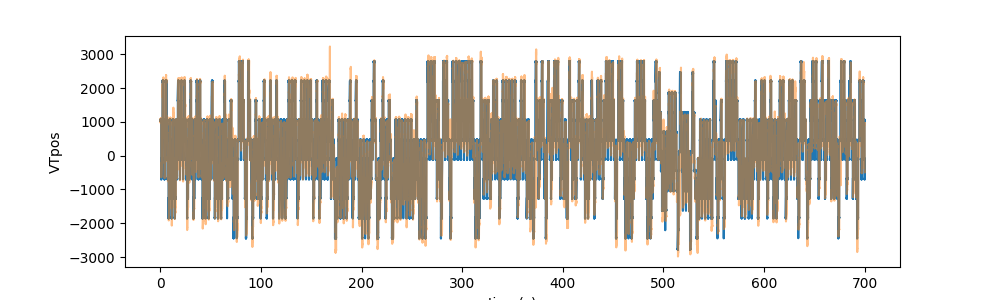

<IPython.core.display.Javascript object>


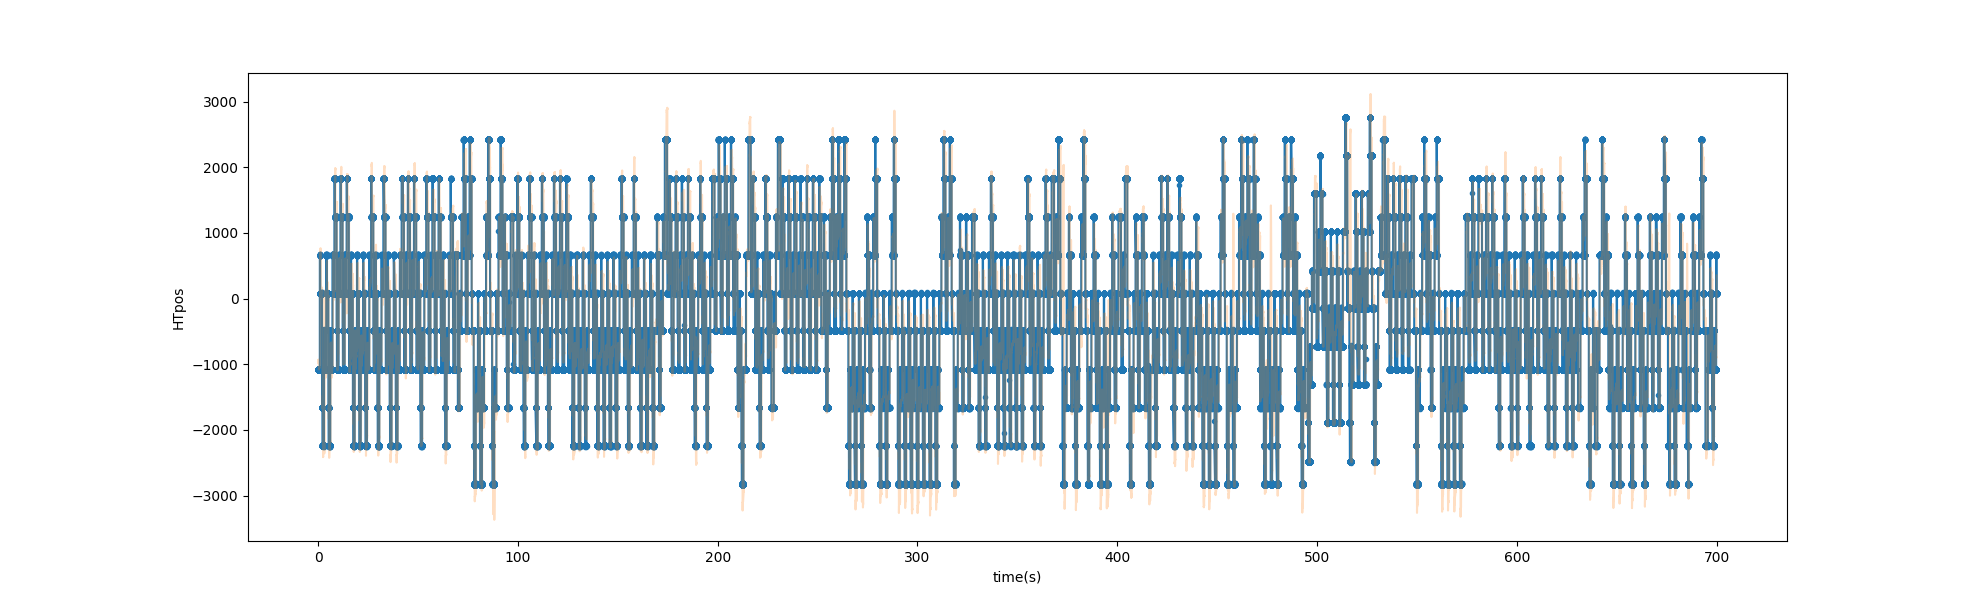

In [17]:
%matplotlib notebook
import scipy.signal

# import time
#time.sleep(5)  

#Params:
t_range = (0,700) #s
fsize = (10,3)


vt = smr_content.get_channel(4)
ve = smr_content.get_channel(2)

ht = smr_content.get_channel(3)
he = smr_content.get_channel(1)

i_range = [int(x/vt.dt) for x in t_range]
prange = slice(i_range[0], i_range[1])

plt.figure(figsize = fsize)
# plt.plot(np.arange(0, vt.data[prange].size)*vt.dt, vt.data[prange]/float(2*vt.divide))
# plt.plot(np.arange(0, vt.data[prange].size)*vt.dt, ve.data[prange]/float(2*ve.divide), alpha=0.5)
plt.plot(np.arange(0, vt.data[prange].size)*vt.dt, vt.data[prange])
plt.plot(np.arange(0, vt.data[prange].size)*vt.dt, ve.data[prange], alpha=0.5)
plt.ylabel(vt.title)
plt.xlabel('time(s)')

plt.figure(figsize = fsize)
# plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, ht.data[prange]/float(2*ht.divide),'.-')
# plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, he.data[prange]/float(2*ht.divide), alpha=0.25)

plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, ht.data[prange],'.-')
plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, he.data[prange], alpha=0.25)

plt.ylabel(ht.title)
plt.xlabel('time(s)')


# find target jumps
ht_diff = np.abs(np.diff(ht.data[prange]))
target_jump_indices = scipy.signal.find_peaks(ht_diff, prominence=200)[0]

# remove detected target jumps that are sequential (less than 5 samples apart)
to_delete = []
for i, tji in enumerate(target_jump_indices[1:]):
    if tji - target_jump_indices[i] < 5:
        to_delete = to_delete + [i+1]
mask = np.ones(target_jump_indices.shape, dtype=bool)
mask[to_delete] = False
target_jump_indices = target_jump_indices[mask]

# plt.plot(peaks*ht.dt, ht.data[prange][peaks], '*r')

# plots.axvlines(plt.gca(), target_jump_indices*ht.dt, alpha = 0.25, color='red')
# plots.axvlines(plt.gca(), 66188*ht.dt, alpha = 0.75, color='g')
# plots.axvlines(plt.gca(), (tji+5)*ht.dt, alpha = 0.75, color='b')
# plots.axvlines(plt.gca(), (tji-5)*ht.dt, alpha = 0.75, color='b')

# plt.figure()
# for i in range(1000):
#     plt.plot(ht.data[prange],vt.data[prange], '.')
#     plt.xlabel(ht.title[i])
#     plt.ylabel(vt.title[i])
#     time.sleep(0.01)
#     plt.cla()

In [ ]:
# target_jumps_to = {}
# for ja in jump_amps:
#     target_jumps_to[ja] = np.array([])

# for tji in target_jump_indices:
#     jump_vec = ht.data[prange][tji + 5] - ht.data[prange][tji - 5]
#     for ja in jump_amps:
#         if jump_vec < ja + bin_size and jump_vec >= ja:
#             target_jumps_to[ja] = np.concatenate((target_jumps_to[ja], [tji]))

# from kaveh import plots
# colors = plt.cm.jet(np.linspace(0,1,jump_amps.size))
# for i, ja in enumerate(jump_amps):
#     plots.axvlines(plt.gca(), target_jumps_to[ja]*ht.dt, alpha = 0.25, color=colors[i])        

# legend_labels = [ht.title , he.title] + [str(ja + bin_size/2) for ja in jump_amps]
# plt.legend(legend_labels)


In [18]:
# histogram of target jumps

jump_vecs = []
for tji in target_jump_indices:
    jump_vecs = jump_vecs + [ht.data[prange][tji + 5] - ht.data[prange][tji - 5]]
#     if ht.data[prange][tji + 5] - ht.data[prange][tji - 5] < 8400 and ht.data[prange][tji + 5] - ht.data[prange][tji - 5] > 8200:
#         print(tji)
#         print(ht.data[prange][tji + 5])
#         print(ht.data[prange][tji - 5])


# bin_size = 200
# plt.figure()
# plt.hist(jump_vecs, bins=np.arange(-10000, 10000, bin_size))
# [hist, bin_edges] = np.histogram(jump_vecs, bins=np.arange(-10000, 10000, bin_size))
# hist[hist < 20] = 0 # remove rare target jump vectors
# jump_amps = bin_edges[np.nonzero(hist)]
# print(jump_amps)

In [19]:
from sklearn.cluster import KMeans
jump_vecs = np.array(jump_vecs).reshape(-1,1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(jump_vecs)
jump_amps = kmeans.cluster_centers_
jump_amps = np.array([int(ja) for ja in jump_amps])

In [20]:
jump_tol = 100

target_jumps_to = {}
for ja in jump_amps:
    target_jumps_to[ja] = np.array([], dtype='int64')

for i, tji in enumerate(target_jump_indices):
#     jump_vec = ht.data[prange][tji + 5] - ht.data[prange][tji - 5]
    for ja in jump_amps:
        if jump_vecs[i] < ja + jump_tol and jump_vecs[i] >= ja - jump_tol:
            target_jumps_to[ja] = np.concatenate((target_jumps_to[ja], [tji]))


In [ ]:

# target_jumps_to = {}

# for i, ja in enumerate(jump_amps):
#     target_jumps_to[ja] = target_jump_indices[np.where(kmeans.labels_ == i)]

# from kaveh import plots
# colors = plt.cm.jet(np.linspace(0,1,jump_amps.size))
# for i, ja in enumerate(jump_amps):
#     plots.axvlines(plt.gca(), target_jumps_to[ja]*ht.dt, alpha = 0.25, color=colors[i])        

# legend_labels = [ht.title , he.title] + [str(ja + bin_size/2) for ja in jump_amps]
# plt.legend(legend_labels)

In [22]:
jump_amps

array([ -581,  1739, -1743])

In [ ]:
# plt.figure()
# plt.hist(ht.data[prange][target_jumps_to[jump_amps[0]]] - kmeans.cluster_centers_[0])

In [ ]:
# i = 1

# distances = jump_vecs[kmeans.labels_ == i] - kmeans.cluster_centers_[i]
# dist_median = np.median(distances)

# # distances = distances + np.abs(np.min(distances))
# MAD = np.median(np.abs(distances - dist_median))
# print(kmeans.cluster_centers_)
# print(jump_vecs[np.where(distances > dist_median + 3*MAD)])
# print(distances[np.where(distances > dist_median + 3*MAD)])

# print(np.size(distances))
# print(np.count_nonzero(distances - np.median(distances)))


In [28]:
print(target_jumps_to[jump_amps[0]].size +target_jumps_to[jump_amps[1]].size+target_jumps_to[jump_amps[2]].size)
print(jump_vecs.size)

1317
1321


<IPython.core.display.Javascript object>


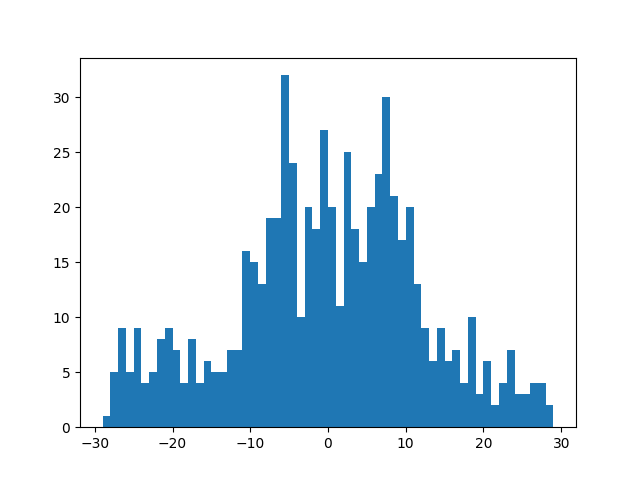

-0.6170542635658914


In [23]:
# np.where(np.abs(distances) >  )
i = 0
distances = np.array([])
for tji in target_jumps_to[jump_amps[i]]:
    jump_vec = [ht.data[prange][tji + 5] - ht.data[prange][tji - 5]]
    distances = np.concatenate((distances, jump_vec - jump_amps[i])) 

# jump_vecs[jump_amps[i]] = ht.data[prange][target_jumps_to[jump_amps[i]]]

# distances = jump_vecs[target_jumps_to[jump_amps[i]]] - jump_amps[i]

# distances = jump_vecs[kmeans.labels_ == i] - kmeans.cluster_centers_[i]

plt.figure()
plt.hist(distances, bins = np.arange(np.min(distances), np.max(distances), 1))

print(np.mean(distances))

In [ ]:
print(target_jumps_to[jump_amps[0]].size + target_jumps_to[jump_amps[1]].size + target_jumps_to[jump_amps[2]].size)
print(target_jump_indices.size)

In [ ]:
    
target_jump_indices[np.where(kmeans.labels_ == 0)]

In [ ]:
a = [3]

b = np.array([1,2])

print(np.concatenate((a,b)))

In [ ]:
primary_to_left = []
primary_to_right = []
corrective_to_right = []
for tji in target_jump_indices:
    jump_vec = ht.data[prange][tji + 5] - ht.data[prange][tji - 5]
    if jump_vec < jump_amps[0] + bin_size and jump_vec > jump_amps[0]:
        primary_to_left = primary_to_left + [tji]
    elif jump_vec < jump_amps[1] + bin_size and jump_vec > jump_amps[1]:
        corrective_to_right = corrective_to_right + [tji]
    elif jump_vec < jump_amps[2] + bin_size and jump_vec > jump_amps[2]:
        primary_to_right = primary_to_right + [tji]

primary_to_left = np.array(primary_to_left)  
primary_to_right = np.array(primary_to_right)
corrective_to_right = np.array(corrective_to_right)

plots.axvlines(plt.gca(), primary_to_right*ht.dt, alpha = 0.25, color='red')        
plots.axvlines(plt.gca(), primary_to_left*ht.dt, alpha = 0.25, color='g')     
plots.axvlines(plt.gca(), corrective_to_right*ht.dt, alpha = 0.25, color='m')     

In [ ]:
t_range = (6,100) #s
fsize = (20,5)


vt = smr_content.get_channel(4)

i_range = [int(x/vt.dt) for x in t_range]
prange = slice(i_range[0], i_range[1])

plt.figure(figsize = fsize)
plt.plot(np.arange(0, vt.data[prange].size)*vt.dt, vt.data[prange], alpha=0.5)
plt.xlabel('time(s)')
ht = smr_content.get_channel(3)
plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, ht.data[prange] , alpha=0.5)
plt.legend(['vertical', 'horizontal'])


In [ ]:
%matplotlib inline
import time
# import pylab as pl
from IPython import display
plt.figure(figsize=(10,10))

for i in range(i_range[0], i_range[1], 5):
    plt.plot(ht.data[i],vt.data[i], '.')
    plt.ylim((-8000,8000))
    plt.xlim((-8000,8000))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.005)
    plt.cla()
#     plt.cla()

In [ ]:
plt.figure(figsize=fsize)
ht_diff = np.abs(np.diff(ht.data[prange]))
plt.plot(np.arange(0, ht_diff.size)*ht.dt, ht_diff)
plt.ylabel("diff of {}".format(ht.title))
plt.xlabel('time(s)')

import scipy.signal

peaks = scipy.signal.find_peaks(ht_diff, prominence=100)[0]-1

plt.plot(peaks*ht.dt, ht_diff[peaks], '*r')
# plt.figure(figsize=fsize)
# plt.plot(scipy.signal.find_peaks(ht_diff)[1])

In [ ]:
# import csv
# import os

# def append_to_csv_string(csv_string, new_string):
#     if not csv_string:
#         return new_string
#     else:
#         return [csv_string] + [new_string]


# source_path = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/'

# with open('behavioral_index.csv', 'a') as f:
#     for root, dirnames, filenames in os.walk(source_path):
#         for filename in filenames:
#             if filename.endswith('smr'):
#                 f_name = os.path.join(root, filename)
#                 csv_row = [f_name];
                
#                 smr_content = File(f_name)
#                 smr_content.read_channels()
                
#                 chans = smr_content.channels
                
#                 for i, chan in enumerate(chans):
#                     if 'VT' in chan.title:
#                         csv_row = csv_row + ['VT'] + [i]
# #                     else:
# #                         csv_row = csv_row + ['VT'] + ['NA']

#                     if 'HT' in chan.title:
#                         csv_row = csv_row + ['HT'] + [i]
# #                     else:
# #                         csv_row = csv_row + ['HT'] + ['NA']

#                     if 'VE' in chan.title:
#                         csv_row = csv_row + ['VE'] + [i]
# #                     else:
# #                         csv_row = csv_row + ['VE'] + ['NA']

#                     if 'HE' in chan.title:
#                         csv_row = csv_row + ['HE'] + [i]
# #                     else:
# #                         csv_row = csv_row + ['HE'] + ['NA']

#                 print(csv_row)
#                 writer = csv.writer(f)
#                 writer.writerow(csv_row)

                        
                    
                    
            